## Arbitrary value imputation with Scikit-learn --SimpleImputer

### Datasets:
- House Prices dataset


### Content:

1. Loading Data and Basic Data Exploration.
2. Train/Test splitting.
3. SimpleImputer on the entire dataset.
4. SimpleImputer: different procedures on different features.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

### 1. Loading Data and Basic Data Exploration

In [2]:
# load the dataset with a few columns for the demonstration

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [3]:
# let's check the null values
data.isnull().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

The variables LotFrontage, MasVnrArea and GarageYrBlt contain missing data.

### 2. Train/Test splitting


In [4]:
# train_test_split

# first remove the target from the features
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3, 
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [5]:
# check the misssing data again
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

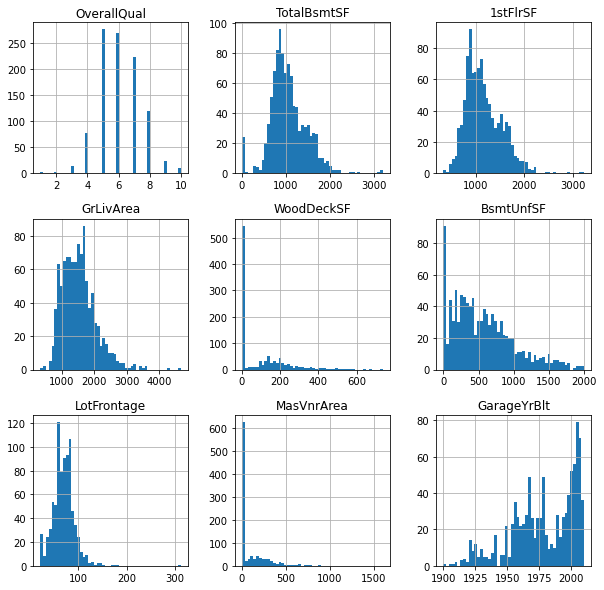

In [6]:
# explore the change in the distributions before the median imputation

X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.hist(bins=50, figsize=(10,10))
plt.show()

### 3. SimpleImputer on the entire dataset

In [7]:
# create an instance of SimpleImputer
# arbitrary value: 999
imputer = SimpleImputer(strategy='constant', 
                       fill_value = 999)

# fit to the train set
imputer.fit(X_train)

SimpleImputer(fill_value=999, strategy='constant')

For arbitrary value imputation, we need to set the strategy to 'constant' and indicate the arbitrary value in the fill_value argument. 

In [8]:
# demo: we can look at the learnt imputation values like this:
imputer.statistics_

array([999., 999., 999., 999., 999., 999., 999., 999., 999.])

In [9]:
# impute the train and test set
# (returned as a numpy array

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[   7., 1057., 1057., ...,  999.,  573., 1998.],
       [   6., 1291., 1291., ...,  999.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0.,  999.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,  999.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [10]:
# transform it back to a dataframe:

X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,999.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,999.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,999.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


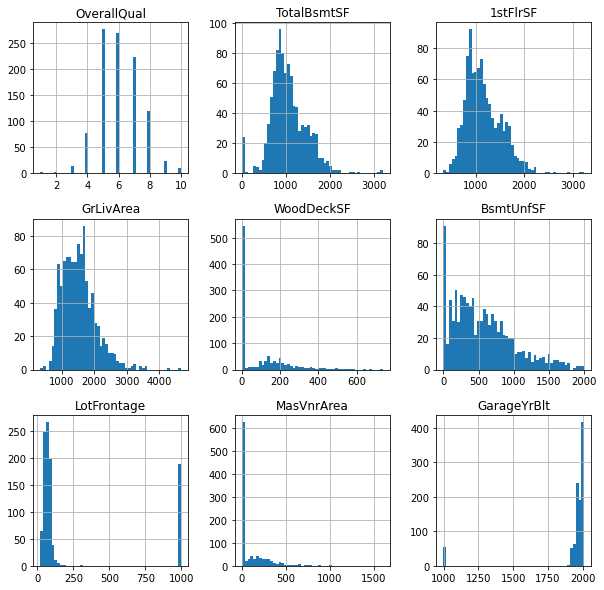

In [11]:
# explore the distributions after the imputation

X_train.hist(bins=50, figsize=(10,10))
plt.show()

Noted: the tall bar at 999 in the LotFrontage's histogram, which appeared after the imputation. Also - the imputation effect on GarageYrBlt, with the bar at the far left right at the 999 value.

### 4. SimpleImputer: different procedures on different features

In [12]:
# train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [13]:
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

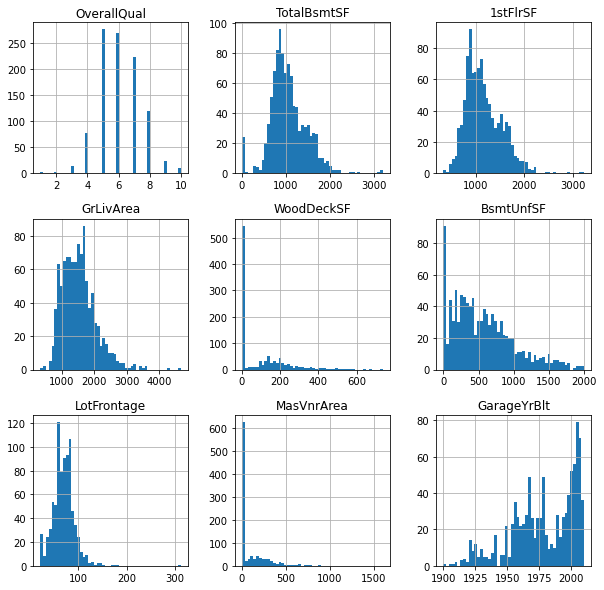

In [14]:
# the distributions of the variables to decide
# whether we use the mean or the median

X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [15]:
print(X_train.LotFrontage.min(), X_train.LotFrontage.max())
print(X_train.MasVnrArea.min(), X_train.MasVnrArea.max())
print(X_train.GarageYrBlt.min(), X_train.GarageYrBlt.max())

21.0 313.0
0.0 1600.0
1900.0 2010.0


In [16]:
# impute each of LotFrontage, MasVnrArea and GarageYrBlt 
# with different arbitrary values:

In [17]:
# lists, indicating which features will be imputed with each method

features_LotFrontAge = ['LotFrontage']
features_MasVnrArea = ['MasVnrArea']
features_GarageYrBlt = ['GarageYrBlt']

# put the features list and the transformers together
# using the column transformer

preprocessor = ColumnTransformer(transformers=[
    ('imputer_LotFrontAge', SimpleImputer(
        strategy='constant', fill_value=0), features_LotFrontAge),
    ('imputer_MasVnrArea', SimpleImputer(
        strategy='constant', fill_value=-1), features_MasVnrArea),
    ('imputer_GarageYrBlt', SimpleImputer(
        strategy='constant', fill_value=1899), features_GarageYrBlt)
], remainder='drop') 

# remainder='drop' -- for returning only 3 mantioned columns               

In [18]:
# fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('imputer_LotFrontAge',
                                 SimpleImputer(fill_value=0,
                                               strategy='constant'),
                                 ['LotFrontage']),
                                ('imputer_MasVnrArea',
                                 SimpleImputer(fill_value=-1,
                                               strategy='constant'),
                                 ['MasVnrArea']),
                                ('imputer_GarageYrBlt',
                                 SimpleImputer(fill_value=1899,
                                               strategy='constant'),
                                 ['GarageYrBlt'])])

In [19]:
# impute the data
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

X_train

array([[   0.,  573., 1998.],
       [   0.,    0., 1996.],
       [  50.,    0., 1899.],
       ...,
       [  68.,    0., 1978.],
       [   0.,   18., 2003.],
       [  58.,   30., 1998.]])

In [20]:
# the result of the imputation is a 3 column dataset
pd.DataFrame(X_train,
             columns=features_LotFrontAge + features_MasVnrArea +
             features_GarageYrBlt).head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,0.0,573.0,1998.0
1,0.0,0.0,1996.0
2,50.0,0.0,1899.0
3,60.0,0.0,1939.0
4,60.0,0.0,1930.0


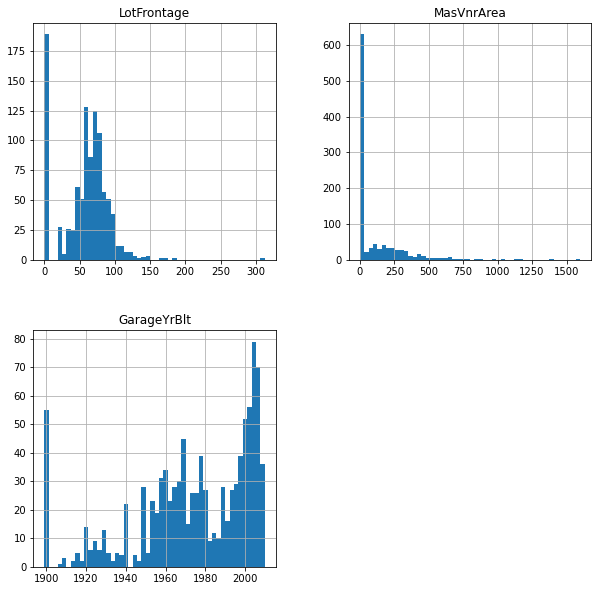

In [21]:
# capture the data back in a dataframe
X_train = pd.DataFrame(X_train,
             columns=features_LotFrontAge + features_MasVnrArea +
             features_GarageYrBlt)

# plotting
X_train.hist(bins=50, figsize=(10,10))
plt.show()